In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
import h5py
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import BatchNormalization
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/gdrive')
import glob

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#Load the file froom google drive
h5f = h5py.File('/gdrive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

In [0]:
#Split train and test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [4]:
#Understand the shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


In [0]:
h5f.close()

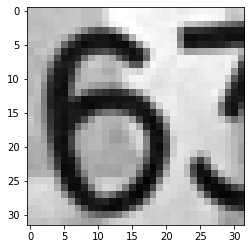

In [8]:
plt.imshow(X_train[1,:,:],cmap='gray')

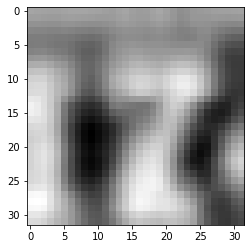

In [0]:
plt.imshow(X_test[1,:,:],cmap='gray')

In [0]:
y_train[1]

6

# Build a Dense layer model with adam as a optimizer function and compile the model to assess the accuracy.

In [0]:
#Represent Training & Testing samples suitable for #tensorflow backend
X_train=X_train.reshape(X_train.shape[0],1024).astype('float32')
X_test=X_test.reshape(X_test.shape[0],1024).astype('float32')

In [0]:
X_train/=255
X_test/=255

In [8]:
X_train.shape

(42000, 1024)

In [9]:
print(len(np.unique(y_train)))
print(len(np.unique(y_test)))

10
10


In [10]:
#Encoding the output class label to One-Hot Encoding
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(1024, input_shape=(1024,),kernel_initializer= 'glorot_uniform',activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=25,verbose=1,validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 25s 598us/step - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 2/25
42000/42000 [==============================] - 25s 586us/step - loss: 2.3028 - acc: 0.1010 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 3/25
42000/42000 [==============================] - 25s 589us/step - loss: 2.3027 - acc: 0.0999 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 4/25
42000/42000 [==============================] - 26s 611us/step - loss: 2.3027 - acc: 0.1013 - val_loss: 2.3028 - val_acc: 0.0982
Epoch 5/25
42000/42000 [==============================] - 25s 603us/step - loss: 2.3028 - acc: 0.0990 - val_loss: 2.3027 - val_acc: 0.0955
Epoch 6/25
42000/42000 [==============================] - 25s 600us/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3027 - val_acc: 0.0955
Epoch 7/25
42000/42000 [==============================] - 26s 617us/step - loss: 2.3027 - acc: 0.0998 - val_loss: 2.

In [16]:
score_model=model.evaluate(X_test,y_test)
score_model

18000/18000 [==============================] - 2s 93us/step


[2.3026638073391386, 0.10022222222222223]

**Build a Dense layer model with SGD as an optimizer function and compile the model to assess the accuracy**

In [18]:
model1 = Sequential()
model1.add(Dense(1024, input_shape=(1024,),kernel_initializer= 'glorot_uniform',activation='relu'))
model1.add(Dense(100, activation ='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=25,verbose=1,validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 17s 401us/step - loss: 2.2428 - acc: 0.1985 - val_loss: 2.1473 - val_acc: 0.2889
Epoch 2/25
42000/42000 [==============================] - 16s 384us/step - loss: 1.9492 - acc: 0.3933 - val_loss: 1.7479 - val_acc: 0.4352
Epoch 3/25
42000/42000 [==============================] - 16s 386us/step - loss: 1.5516 - acc: 0.5351 - val_loss: 1.4117 - val_acc: 0.5800
Epoch 4/25
42000/42000 [==============================] - 16s 382us/step - loss: 1.3076 - acc: 0.6097 - val_loss: 1.2769 - val_acc: 0.5938
Epoch 5/25
42000/42000 [==============================] - 16s 391us/step - loss: 1.1786 - acc: 0.6407 - val_loss: 1.1362 - val_acc: 0.6576
Epoch 6/25
42000/42000 [==============================] - 16s 381us/step - loss: 1.0984 - acc: 0.6642 - val_loss: 1.1155 - val_acc: 0.6511
Epoch 7/25
42000/42000 [==============================] - 16s 391us/step - loss: 1.0384 - acc: 0.6807 - val_loss: 1.

In [19]:
score_model1=model1.evaluate(X_test,y_test)
score_model1

18000/18000 [==============================] - 2s 96us/step


[0.7388296452893152, 0.779]

**Build a Dense layer model with SGD as a optimizer function and Batch Normalizatio**n

In [20]:
model3 = Sequential()

model3.add(Dense(1024, input_shape=(1024,),kernel_initializer= 'glorot_uniform',activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(100,kernel_initializer= 'glorot_uniform',activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

#Output layer
model3.add(Dense(10,kernel_initializer= 'glorot_uniform',activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model3.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
model3.fit(X_train,y_train,epochs=25,verbose=1,validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 21s 489us/step - loss: 1.8636 - acc: 0.3710 - val_loss: 1.5513 - val_acc: 0.5071
Epoch 2/25
42000/42000 [==============================] - 20s 480us/step - loss: 1.5015 - acc: 0.5033 - val_loss: 2.2181 - val_acc: 0.3247
Epoch 3/25
42000/42000 [==============================] - 20s 477us/step - loss: 1.6566 - acc: 0.4410 - val_loss: 2.5875 - val_acc: 0.2529
Epoch 4/25
42000/42000 [==============================] - 20s 481us/step - loss: 1.7928 - acc: 0.3784 - val_loss: 1.8539 - val_acc: 0.3936
Epoch 5/25
42000/42000 [==============================] - 20s 479us/step - loss: 1.6813 - acc: 0.4179 - val_loss: 1.5196 - val_acc: 0.4894
Epoch 6/25
42000/42000 [==============================] - 20s 479us/step - loss: 1.5553 - acc: 0.4790 - val_loss: 1.5645 - val_acc: 0.4906
Epoch 7/25
42000/42000 [==============================] - 21s 490us/step - loss: 1.5618 - acc: 0.4759 - val_loss: 1.

In [22]:
score_model3=model3.evaluate(X_test,y_test)
score_model3

18000/18000 [==============================] - 2s 107us/step


[1.0922730718188816, 0.6634444444444444]

#Build a model with Convolution2D years with Pooling and Early stopping

In [0]:
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

In [0]:
print(len(np.unique(y_train)))
print(len(np.unique(y_test)))

10
10


In [0]:
X_train /= 255
X_test /= 255
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


In [0]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
print(len(np.unique(y_train)))
print(len(np.unique(y_test)))

2
2


In [0]:
y_train.shape

(42000, 10)

In [0]:
X_train.shape

(42000, 32, 32, 1)

In [0]:
EPOCHS = 10

In [0]:
 # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(32,32,1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))
    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(X_train, y_train, epochs= EPOCHS, 
              validation_data=(X_test, y_test), callbacks=callback_list)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  





Train on 42000 samples, validate on 18000 samples
Epoch 1/10





42000/42000 [==============================] - 173s 4ms/step - loss: 0.9107 - acc: 0.7131 - val_loss: 0.5518 - val_acc: 0.8404
Epoch 2/10
42000/42000 [==============================] - 173s 4ms/step - loss: 0.4623 - acc: 0.8642 - val_loss: 0.4717 - val_acc: 0.8684
Epoch 3/10
42000/42000 [==============================] - 174s 4ms/step - loss: 0.3656 - acc: 0.8919 - val_loss: 0.4883 - val_acc: 0.8582
Epoch 4/10
42000/42000 [==============================] - 172s 4ms/step - loss: 0.2942 - acc: 0.9121 - val_loss: 0.4448 - val_acc: 0.8779
Epoch 5/10
42000/42000 [==============================] - 176s 4ms/step - loss: 0.2441 - acc: 0.9252 - val_loss: 0.4701 - val_acc: 0.8708
Epoch 6/10
42000/42000 [==============================] - 176s 4ms/step - loss: 0.2045 - acc: 0.9378 - val_loss: 0.4725 - val_acc: 0.8793
Epoch 7/10
42000/42000 [==============================] - 172s 4ms/step - loss: 0.1604 - acc: 0.9515 - val_loss: 0

In [0]:
#Evaluate the training accuracy
loss_and_metrics = model2.evaluate(X_train, y_train)
print(loss_and_metrics)

42000/42000 [==============================] - 27s 647us/step
[0.07452337665917973, 0.9771904761904762]


In [0]:
#Evaluate the test accuracy
loss_and_metrics = model2.evaluate(X_test, y_test)
print(loss_and_metrics)

18000/18000 [==============================] - 12s 647us/step
[0.6624183830155267, 0.8676111111111111]
